# Machine Learning

## Tipos de Machine learning
* Aprendizaje Supervisado
    - Regresión
    - Clasificaion (1 binaria, 2 multiclase)
* Aprendizaje No supervisado
    - K-MEANS
    - DBSCAN
* Aprendizaje por refuerzo

# PASOS para crear un modelo de ML
1) Cargar el dataset <br>
2) Explorar los datos pandas y visualización (matplotlib) <br>
3) Transformar los datos<br>
4) Separar en datos de entrenamiento y prueba<br>
5) Crear el modelo de ML<br>
6) Entrenar y probar el modelo<br>
7) Mejorar el modelo y evaluar su exactitud<br>
8) Hacer predicciones con datos reales<br>

In [1]:
import sklearn

# Caso de estudio : Clasificación con K-Nearest Neighbors y el dataset Digits

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [8]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [5]:
len(digits.target)

1797

In [6]:
digits.target[::100]

array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

In [7]:
digits.data.shape

(1797, 64)

In [8]:
digits.images[13]

array([[ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.],
       [ 0.,  4., 13.,  8.,  9., 16.,  8.,  0.],
       [ 0.,  0.,  0.,  6., 14., 15.,  3.,  0.],
       [ 0.,  0.,  0., 11., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2., 15.,  4.,  0.],
       [ 0.,  1.,  5.,  6., 13., 16.,  6.,  0.],
       [ 0.,  2., 12., 12., 13., 11.,  0.,  0.]])

## Visualizando el dataset iris

In [9]:
import matplotlib.pyplot as plt

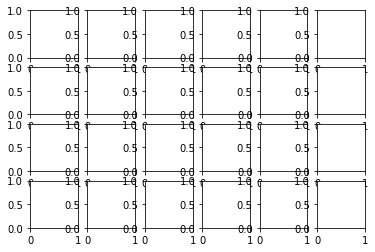

In [10]:
figura, axes = plt.subplots(nrows=4, ncols=6, figsize=(6,4))

In [11]:
for item in zip(axes.ravel(), digits.images, digits.target):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(target)
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

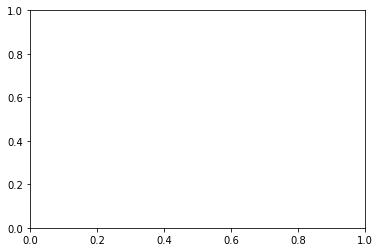

In [12]:
axes = plt.subplot()

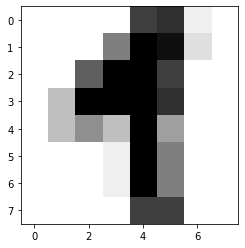

In [13]:
image = plt.imshow(digits.images[56], cmap=plt.cm.gray_r)
xticks = axes.set_xticks([])
yticks = axes.set_yticks([])

In [74]:
digits.images[56]

array([[ 0.,  0.,  0.,  0., 12., 13.,  1.,  0.],
       [ 0.,  0.,  0.,  8., 16., 15.,  2.,  0.],
       [ 0.,  0., 10., 16., 16., 12.,  0.,  0.],
       [ 0.,  4., 16., 16., 16., 13.,  0.,  0.],
       [ 0.,  4.,  7.,  4., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 12., 12.,  0.,  0.]])

In [34]:
# Separar en entrenamienrto y prueba

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target, random_state=16)

In [38]:
X_test

array([[ 0.,  0.,  0., ..., 15.,  5.,  0.],
       [ 0.,  0.,  7., ..., 12.,  1.,  0.],
       [ 0.,  0.,  1., ..., 16., 12.,  0.],
       ...,
       [ 0.,  0.,  7., ...,  5.,  0.,  0.],
       [ 0.,  0.,  2., ...,  0.,  0.,  0.],
       [ 0.,  0.,  4., ...,  0.,  0.,  0.]])

In [39]:
Y_test

array([6, 8, 3, 1, 8, 9, 0, 0, 0, 9, 2, 8, 1, 4, 9, 4, 2, 1, 3, 3, 7, 5,
       9, 7, 8, 0, 5, 2, 0, 3, 5, 9, 8, 8, 0, 7, 5, 1, 7, 7, 5, 0, 3, 2,
       3, 9, 4, 1, 0, 5, 5, 5, 4, 2, 2, 8, 3, 3, 5, 7, 9, 0, 0, 0, 9, 7,
       5, 9, 6, 0, 2, 8, 8, 0, 3, 0, 6, 8, 0, 1, 2, 2, 5, 8, 2, 7, 8, 9,
       3, 3, 3, 7, 3, 4, 0, 2, 1, 7, 6, 3, 7, 6, 4, 8, 7, 8, 4, 2, 9, 5,
       0, 3, 5, 0, 4, 7, 1, 0, 2, 0, 1, 3, 5, 1, 9, 2, 7, 5, 6, 6, 7, 6,
       3, 5, 8, 3, 6, 3, 9, 4, 7, 6, 4, 0, 6, 2, 0, 1, 4, 8, 6, 3, 6, 3,
       1, 6, 7, 0, 5, 8, 1, 4, 1, 5, 5, 4, 6, 2, 2, 3, 0, 4, 8, 9, 8, 0,
       6, 0, 8, 8, 7, 4, 2, 7, 5, 2, 5, 5, 8, 8, 3, 2, 4, 6, 8, 6, 3, 1,
       7, 7, 0, 4, 7, 6, 4, 3, 3, 9, 4, 9, 9, 6, 8, 1, 1, 8, 2, 7, 3, 2,
       0, 4, 4, 5, 2, 1, 3, 0, 1, 4, 0, 9, 1, 4, 7, 8, 6, 4, 6, 1, 5, 4,
       1, 6, 7, 9, 7, 2, 9, 1, 3, 0, 7, 4, 7, 9, 9, 5, 4, 9, 7, 8, 2, 6,
       6, 4, 5, 6, 0, 9, 8, 6, 1, 8, 2, 7, 1, 7, 7, 3, 4, 9, 0, 6, 1, 7,
       7, 2, 8, 4, 0, 4, 7, 1, 2, 2, 7, 9, 6, 4, 3,

In [40]:
X_train.shape

(1347, 64)

In [43]:
1797*.25

449.25

In [42]:
X_test.shape

(450, 64)

In [16]:
#crear el modelo
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier()

In [18]:
knn.fit(X = X_train, y = Y_train)

KNeighborsClassifier()

In [59]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [19]:
predicted = knn.predict(X=X_test)

In [20]:
esperado = Y_test

In [21]:
predicted

array([6, 8, 3, 1, 8, 9, 0, 0, 0, 9, 2, 8, 1, 4, 9, 4, 2, 1, 3, 3, 7, 5,
       9, 7, 8, 0, 5, 2, 0, 3, 5, 9, 8, 8, 0, 7, 5, 1, 7, 7, 5, 0, 3, 2,
       3, 8, 4, 1, 0, 5, 5, 5, 4, 2, 2, 8, 3, 3, 5, 7, 9, 0, 0, 0, 9, 7,
       5, 9, 6, 0, 2, 8, 8, 0, 3, 0, 6, 8, 0, 1, 2, 2, 5, 8, 2, 7, 8, 3,
       3, 3, 3, 7, 3, 4, 0, 2, 1, 7, 6, 3, 7, 6, 4, 8, 7, 8, 4, 2, 9, 5,
       0, 3, 5, 0, 4, 7, 1, 0, 2, 0, 1, 3, 5, 1, 9, 2, 7, 5, 6, 6, 7, 6,
       3, 5, 8, 3, 6, 3, 9, 4, 7, 6, 4, 0, 6, 2, 0, 1, 4, 8, 6, 3, 6, 3,
       1, 6, 7, 0, 5, 8, 1, 4, 1, 5, 5, 4, 6, 2, 2, 3, 0, 4, 8, 9, 8, 0,
       6, 0, 8, 8, 7, 4, 2, 7, 5, 2, 5, 5, 8, 8, 3, 2, 4, 6, 8, 6, 3, 1,
       7, 7, 0, 4, 7, 6, 4, 3, 3, 9, 4, 9, 9, 6, 8, 1, 1, 8, 2, 7, 3, 2,
       0, 4, 4, 5, 2, 1, 3, 0, 1, 4, 0, 9, 1, 4, 7, 8, 6, 4, 6, 1, 5, 4,
       1, 6, 7, 9, 7, 2, 9, 1, 3, 0, 7, 4, 7, 9, 9, 5, 4, 9, 7, 8, 2, 6,
       6, 4, 5, 6, 0, 9, 8, 6, 1, 3, 2, 7, 1, 7, 7, 3, 4, 9, 0, 6, 1, 7,
       7, 2, 8, 4, 0, 4, 7, 1, 2, 2, 7, 9, 6, 4, 3,

In [22]:
esperado

array([6, 8, 3, 1, 8, 9, 0, 0, 0, 9, 2, 8, 1, 4, 9, 4, 2, 1, 3, 3, 7, 5,
       9, 7, 8, 0, 5, 2, 0, 3, 5, 9, 8, 8, 0, 7, 5, 1, 7, 7, 5, 0, 3, 2,
       3, 9, 4, 1, 0, 5, 5, 5, 4, 2, 2, 8, 3, 3, 5, 7, 9, 0, 0, 0, 9, 7,
       5, 9, 6, 0, 2, 8, 8, 0, 3, 0, 6, 8, 0, 1, 2, 2, 5, 8, 2, 7, 8, 9,
       3, 3, 3, 7, 3, 4, 0, 2, 1, 7, 6, 3, 7, 6, 4, 8, 7, 8, 4, 2, 9, 5,
       0, 3, 5, 0, 4, 7, 1, 0, 2, 0, 1, 3, 5, 1, 9, 2, 7, 5, 6, 6, 7, 6,
       3, 5, 8, 3, 6, 3, 9, 4, 7, 6, 4, 0, 6, 2, 0, 1, 4, 8, 6, 3, 6, 3,
       1, 6, 7, 0, 5, 8, 1, 4, 1, 5, 5, 4, 6, 2, 2, 3, 0, 4, 8, 9, 8, 0,
       6, 0, 8, 8, 7, 4, 2, 7, 5, 2, 5, 5, 8, 8, 3, 2, 4, 6, 8, 6, 3, 1,
       7, 7, 0, 4, 7, 6, 4, 3, 3, 9, 4, 9, 9, 6, 8, 1, 1, 8, 2, 7, 3, 2,
       0, 4, 4, 5, 2, 1, 3, 0, 1, 4, 0, 9, 1, 4, 7, 8, 6, 4, 6, 1, 5, 4,
       1, 6, 7, 9, 7, 2, 9, 1, 3, 0, 7, 4, 7, 9, 9, 5, 4, 9, 7, 8, 2, 6,
       6, 4, 5, 6, 0, 9, 8, 6, 1, 8, 2, 7, 1, 7, 7, 3, 4, 9, 0, 6, 1, 7,
       7, 2, 8, 4, 0, 4, 7, 1, 2, 2, 7, 9, 6, 4, 3,

In [23]:
predicted == esperado

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [24]:
error = [(p,e) for (p,e) in zip(predicted, esperado) if p != e]

In [25]:
error

[(8, 9), (3, 9), (3, 8)]

In [71]:
len(predicted)

450

In [26]:
(len(esperado)-len(error)) / len(esperado) *100

99.33333333333333

In [27]:
import numpy as np
new = np.array([[ 
        0.,  0.,  0.,  0., 0., 0.,  0.,  0.,
        0.,  0.,  0.,  0., 16., 0.,  0.,  0.,
        0.,  0., 0., 16., 16., 0.,  0.,  0.,
        0.,  0., 16., 0., 16., 0.,  0.,  0.,
        0.,  0.,  0.,  0., 16.,  0.,  0.,  0.,
        0.,  0.,  0.,  0., 16.,  0.,  0.,  0.,
        0.,  0.,  0.,  0., 16.,  0.,  0.,  0.,
        0.,  0.,  0.,  0., 0., 0.,  0.,  0.],
        [ 
        0.,  0.,  0.,  0., 0., 0.,  0.,  0.,
        0.,  0.,  16.,  16., 16., 0.,  0.,  0.,
        0.,  0., 16., 16., 0., 0.,  16.,  0.,
        0.,  0., 16., 0., 0., 0.,  16.,  0.,
        0.,  0.,  16.,  0., 0.,  0.,  16.,  0.,
        0.,  0.,  16.,  0., 0.,  0.,  16.,  0.,
        0.,  0.,  16.,  16., 16.,  16.,  16.,  0.,
        0.,  0.,  0.,  0., 0., 0.,  0.,  0.],
        ])

In [120]:
X_train[0].shape

(64,)

In [126]:
new 

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 16.,
         0.,  0.,  0.,  0.,  0.,  0., 16., 16.,  0.,  0.,  0.,  0.,  0.,
        16.,  0., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  0.,  0.,
         0.,  0.,  0.,  0.,  0., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        16.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 16., 16., 16.,
         0.,  0.,  0.,  0.,  0., 16., 16.,  0.,  0., 16.,  0.,  0.,  0.,
        16.,  0.,  0.,  0., 16.,  0.,  0.,  0., 16.,  0.,  0.,  0., 16.,
         0.,  0.,  0., 16.,  0.,  0.,  0., 16.,  0.,  0.,  0., 16., 16.,
        16., 16., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [122]:
new.shape

(1, 64)

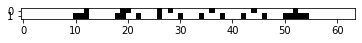

In [29]:
image = plt.imshow(new, cmap=plt.cm.gray_r)

In [117]:
X_train[0].shape

(64,)

In [28]:
knn.predict(new)

array([1, 0])

# Métricas

In [32]:
knn.score(X_test, Y_test)*100

99.33333333333333

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
matriz_de_confusion = confusion_matrix(y_true=esperado, y_pred=predicted)

In [35]:
matriz_de_confusion

array([[44,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 43,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 48,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 48,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 42,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 57,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0, 44,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 39]])

In [36]:
from sklearn.metrics import classification_report

In [37]:
nombres = [str(digit) for digit in digits.target_names]

In [39]:
nombres

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [40]:
print(classification_report(esperado, predicted, target_names=nombres))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        43
           2       1.00      1.00      1.00        40
           3       0.96      1.00      0.98        48
           4       1.00      1.00      1.00        48
           5       1.00      1.00      1.00        42
           6       1.00      1.00      1.00        42
           7       1.00      1.00      1.00        57
           8       0.98      0.98      0.98        45
           9       1.00      0.95      0.97        41

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [41]:
import pandas as pd

In [42]:
confusion_df = pd.DataFrame(matriz_de_confusion, index=range(10), columns=range(10))

In [43]:
confusion_df

,0,1,2,3,4,5,6,7,8,9
0,44,0,0,0,0,0,0,0,0,0
1,0,43,0,0,0,0,0,0,0,0
2,0,0,40,0,0,0,0,0,0,0
3,0,0,0,48,0,0,0,0,0,0
4,0,0,0,0,48,0,0,0,0,0
5,0,0,0,0,0,42,0,0,0,0
6,0,0,0,0,0,0,42,0,0,0
7,0,0,0,0,0,0,0,57,0,0
8,0,0,0,1,0,0,0,0,44,0
9,0,0,0,1,0,0,0,0,1,39


In [44]:
import seaborn as sns

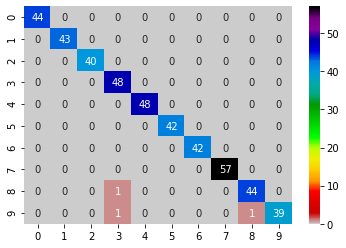

In [45]:
axes = sns.heatmap(confusion_df, annot=True, cmap='nipy_spectral_r')

In [46]:
# k-fold cross validation

In [48]:
from sklearn.model_selection import KFold

In [49]:
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

In [50]:
from sklearn.model_selection import cross_val_score

In [51]:
scores = cross_val_score(estimator=knn, X=digits.data, y = digits.target, cv=kfold)

In [53]:
scores

array([0.97777778, 0.99444444, 0.98888889, 0.97777778, 0.98888889,
       0.99444444, 0.97777778, 0.98882682, 1.        , 0.98324022])

# Caso de estudio: Series de tiempo y regresión lineal simple

In [54]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

In [55]:
nyc.columns = ["Fecha", "Temperatura", "Anomalía"]

In [56]:
nyc.Fecha = nyc.Fecha.floordiv(100)

In [57]:
nyc

,Fecha,Temperatura,Anomalía
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0
...,...,...,...
119,2014,35.5,-1.9
120,2015,36.1,-1.3
121,2016,40.8,3.4
122,2017,42.8,5.4


In [68]:
nyc.describe

<bound method NDFrame.describe of      Fecha  Temperatura  Anomalía
0     1895         34.2      -3.2
1     1896         34.7      -2.7
2     1897         35.5      -1.9
3     1898         39.6       2.2
4     1899         36.4      -1.0
..     ...          ...       ...
119   2014         35.5      -1.9
120   2015         36.1      -1.3
121   2016         40.8       3.4
122   2017         42.8       5.4
123   2018         38.7       1.3

[124 rows x 3 columns]>

In [58]:
X_train, X_test, y_train, y_test = train_test_split(nyc.Fecha.values.reshape(-1,1), nyc.Temperatura.values, random_state=11)

In [61]:
X_train

array([[1996],
       [1944],
       [2012],
       [1923],
       [1946],
       [2017],
       [2002],
       [2016],
       [1949],
       [1955],
       [1915],
       [1994],
       [1961],
       [1947],
       [2000],
       [1906],
       [1936],
       [1926],
       [1997],
       [2010],
       [2001],
       [1964],
       [1973],
       [1995],
       [1990],
       [1941],
       [1942],
       [1982],
       [2006],
       [1913],
       [1988],
       [1991],
       [1967],
       [1933],
       [2018],
       [1914],
       [2003],
       [1963],
       [1903],
       [1898],
       [1998],
       [1954],
       [1945],
       [2009],
       [1948],
       [1900],
       [1980],
       [1935],
       [2005],
       [1993],
       [2013],
       [1902],
       [1909],
       [1939],
       [1984],
       [1952],
       [1905],
       [1989],
       [1922],
       [1918],
       [1974],
       [1959],
       [1938],
       [1965],
       [1962],
       [1912],
       [20

In [62]:
X_test

array([[1968],
       [1897],
       [1972],
       [1904],
       [1911],
       [2011],
       [1895],
       [1931],
       [1956],
       [1951],
       [1924],
       [1992],
       [1934],
       [1999],
       [1901],
       [1937],
       [1985],
       [1970],
       [1983],
       [2008],
       [1978],
       [1925],
       [1930],
       [1960],
       [1910],
       [1957],
       [1953],
       [1981],
       [1917],
       [1916],
       [1921]])

In [63]:
y_train

array([37. , 39. , 44.2, 35.2, 40.2, 42.8, 45.4, 40.8, 43.5, 35.6, 38.9,
       31.6, 31.9, 43. , 37.8, 42.3, 34.3, 37.2, 39.2, 38.1, 38.8, 40.2,
       40.6, 42.6, 46. , 34.5, 36.5, 30.9, 47.6, 46.9, 34.2, 39.6, 41.6,
       45.6, 38.7, 36.9, 32.9, 34.6, 35.5, 39.6, 45.8, 37. , 31.5, 33.4,
       30.1, 37.4, 38. , 35. , 37.4, 41. , 40.8, 35. , 39.6, 36.8, 33.5,
       42.4, 33.7, 42.4, 33.4, 26.5, 39.7, 37.1, 37.3, 34. , 38. , 29.3,
       43.6, 36.1, 35.5, 38.6, 47.6, 35.7, 34.7, 40.5, 37.8, 36.4, 30. ,
       36.8, 36.1, 35.9, 31. , 40.6, 26.1, 37.1, 40. , 31.5, 38.3, 47.6,
       32.6, 39.3, 41.7, 36.4, 29.7])

In [64]:
y_test

array([31.7, 35.5, 40.5, 29.8, 40.7, 34.8, 34.2, 38.2, 36.2, 42.5, 39.4,
       40.9, 39.8, 40.8, 37. , 45.7, 33. , 29.9, 38. , 42.4, 32.3, 33.8,
       38.5, 37.8, 36.1, 33.8, 42.4, 30.6, 38.4, 42.3, 39.7])

In [66]:
X_train.shape

(93, 1)

In [69]:
X_test.shape

(31, 1)

In [70]:
from sklearn.linear_model import LinearRegression

In [72]:
regresion_lineal = LinearRegression()

In [73]:
regresion_lineal.fit(X=X_train, y=y_train)

LinearRegression()

In [74]:
regresion_lineal.coef_

array([0.01939167])

In [75]:
regresion_lineal.intercept_

-0.30779820252656265

$y = mx+b$

In [76]:
predict = regresion_lineal.predict(X_test)

In [77]:
esperado = y_test

In [78]:
for p, e in zip(predict[::5], esperado[::5]):
    print(f'predicted: {p:.2f}, esperado: {e:.2f}')

predicted: 37.86, esperado: 31.70
predicted: 38.69, esperado: 34.80
predicted: 37.00, esperado: 39.40
predicted: 37.25, esperado: 45.70
predicted: 38.05, esperado: 32.30
predicted: 37.64, esperado: 33.80
predicted: 36.94, esperado: 39.70


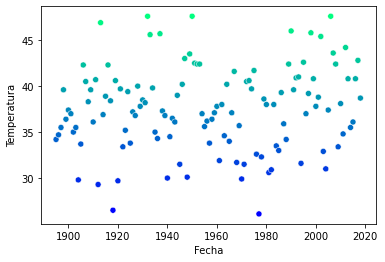

In [81]:
axes = sns.scatterplot(data=nyc, x="Fecha", y='Temperatura', hue = "Temperatura", palette='winter', legend=False)

In [82]:
axes.set_ylim(10,70)

(10.0, 70.0)

In [84]:
x = np.array([min(nyc.Fecha.values), max(nyc.Fecha.values)])

In [86]:
x

array([1895, 2018])

In [90]:
y = regresion_lineal.predict(x.reshape(-1, 1))

In [91]:
y

array([36.43942269, 38.82459851])

In [1]:
line = plt.plot(x,y)
line.show()

NameError: name 'plt' is not defined